IMPORTING MODULES

In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler


import os
import random

In [2]:
#Suppress warning messages

import warnings
warnings.filterwarnings('ignore')

READING DATASET

In [3]:
os.chdir(r"C:\Users\CC\Downloads")
data=pd.read_csv('bank_marketing (1) (2).csv')

In [4]:
data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no
5577,5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure,no
5578,5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
5579,5579,46,blue-collar,married,secondary,no,1568,yes,no,cellular,2,jun,310,1,55,6,other,yes


In [5]:
df = data.drop(data.columns[0],axis=1)
print(df)

      age          job  marital  education default  balance housing loan  \
0      41     services  married    unknown      no       88     yes   no   
1      56   technician  married  secondary      no     1938      no  yes   
2      30     services   single  secondary      no      245      no  yes   
3      34   management   single   tertiary      no     1396     yes   no   
4      29   technician   single  secondary      no      -13     yes   no   
...   ...          ...      ...        ...     ...      ...     ...  ...   
5576   48       admin.  married  secondary      no     2235     yes  yes   
5577   40  blue-collar  married    primary      no     -388     yes   no   
5578   27      student   single  secondary      no       91      no   no   
5579   46  blue-collar  married  secondary      no     1568     yes   no   
5580   39     services  married  secondary      no        0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cell

STUDY DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 741.4+ KB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000
mean,41.169683,1514.736786,15.693603,368.175954,2.507436,52.534313,0.849669
std,11.926044,3266.534626,8.461086,344.131053,2.770717,110.754995,2.311684
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,110.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,49.000000,1747.000000,22.000000,485.000000,3.000000,57.000000,1.000000
max,93.000000,81204.000000,31.000000,3284.000000,63.000000,842.000000,41.000000


age: minimum age of the client is 18 while the maximum age is 93 The average age of the clients is 41.​

balance: the maximum balance is 81204.00, while the minimum balance is -3058.00. The mean balance stands at 1514.73.​

duration: the maximum duration of a single contact lasted for 3284 seconds, while the shortest duration of a contact with a client lasted for 3 seconds.​

campaign: the maximum number of contacts made in the campaign to a single client is 63 while the minimum number of contacts is 1. The average number of contacts made was 2.5.​

pdays: a maximum of 842 days passed by after a client was last contacted, while a minimum of -1 days passed by after a client was last contacted. So we can drop this column, because -1 makes more than 50% of the values of the column.​

previous: a maximum of 41 contacts were made previously to a single client before the current campaign., while a minimum of 0 contacts were previously made.

In [8]:
#Summary of categorical variables
summary_cate = df.describe(include = "O")
print(summary_cate)

               job  marital  education default housing  loan   contact month  \
count         5581     5581       5581    5581    5581  5581      5581  5581   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no      no    no  cellular   may   
freq          1318     3134       2719    5497    2928  4863      4044  1407   

       poutcome deposit  
count      5581    5581  
unique        4       2  
top     unknown      no  
freq       4133    2959  


In [9]:
print("Shape before removing duplicates:",df.shape)

Shape before removing duplicates: (5581, 17)


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5576    False
5577    False
5578    False
5579    False
5580    False
Length: 5581, dtype: bool

In [11]:
df=df.drop_duplicates()

In [12]:
print("Shape after removing duplicates:",df.shape)

Shape after removing duplicates: (5581, 17)


The shape of the dataset remains the same, this implies that there is no presence of duplicated values.

In [13]:
df.nunique()

age            73
job            12
marital         3
education       4
default         2
balance      2641
housing         2
loan            2
contact         3
day            31
month          12
duration     1180
campaign       35
pdays         379
previous       30
poutcome        4
deposit         2
dtype: int64

HANDLING NULL VALUES

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no null values in the dataset.

# Categorical columns exploration

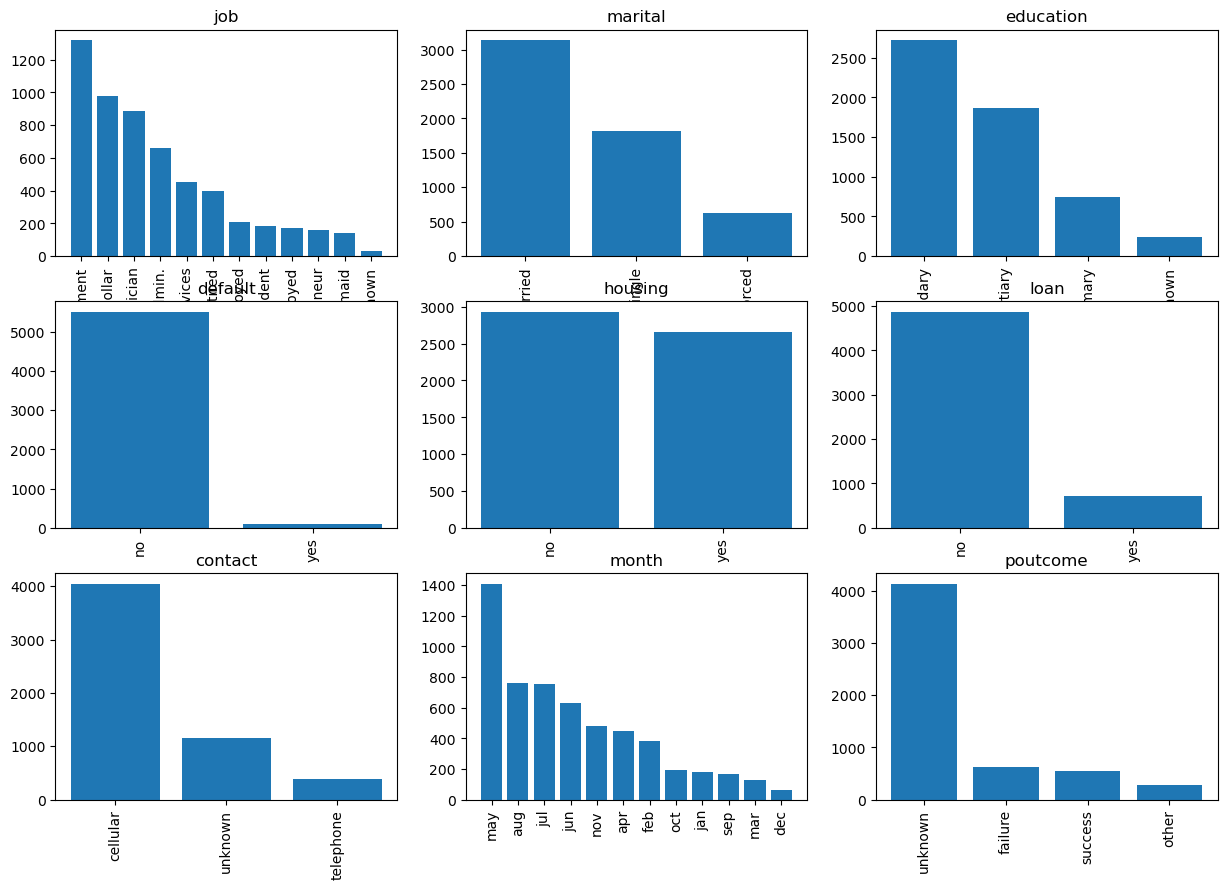

In [15]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(15, 10))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

# Numerical columns exploration

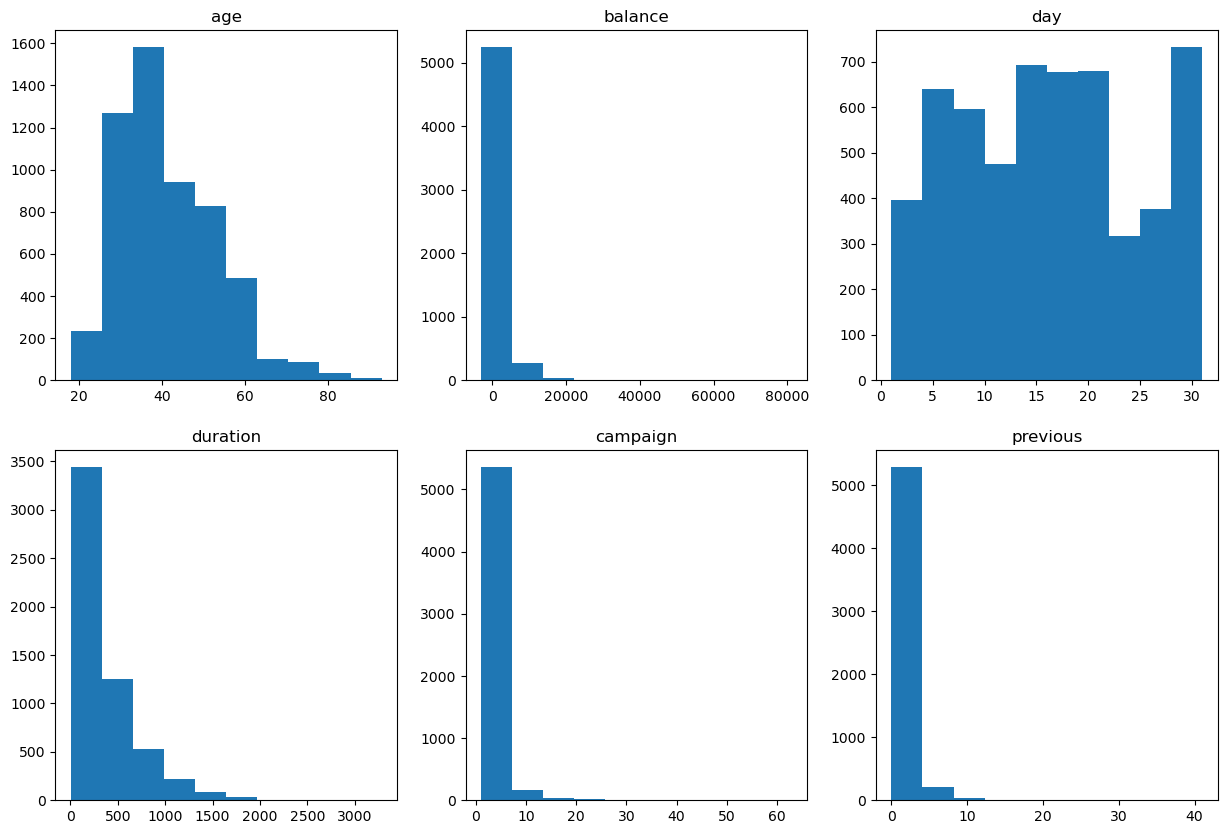

In [16]:
num_columns = ['age','balance', 'day','duration', 'campaign', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()


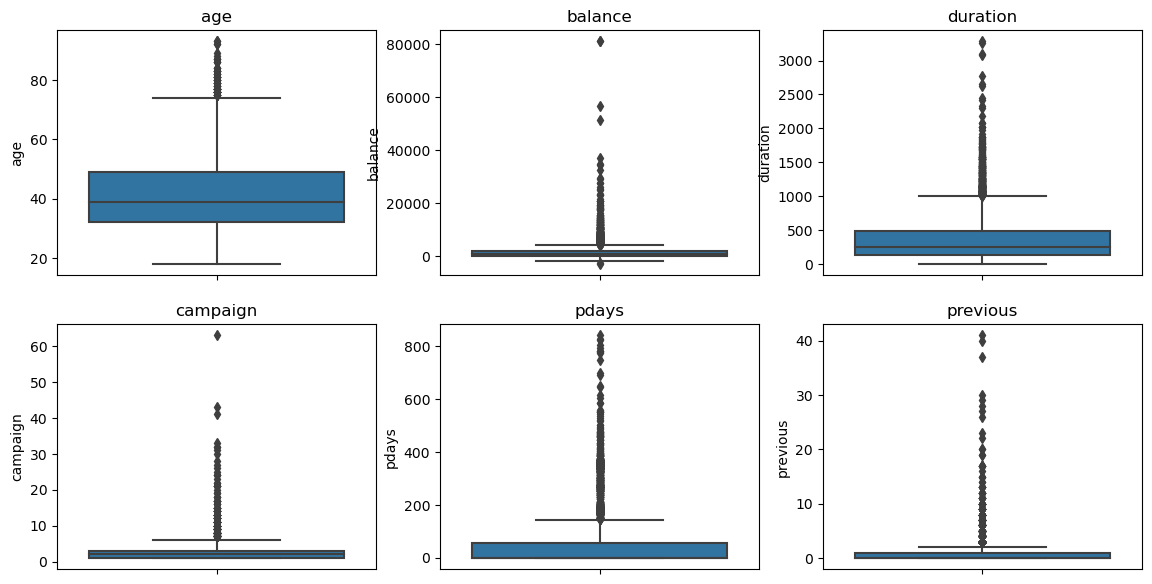

In [17]:
#box plot
fig, ax = plt.subplots(2, 3, figsize=(14,7))
bp=sns.boxplot(y=df.age,ax=ax[0, 0])
ax[0, 0].set_title('age')
bp=sns.boxplot(y=df.balance,ax=ax[0, 1])
ax[0, 1].set_title('balance')
bp=sns.boxplot(y=df.duration,ax=ax[0, 2])
ax[0,2].set_title('duration')
bp=sns.boxplot(y=df.campaign,ax=ax[1, 0])
ax[1,0].set_title('campaign')
bp=sns.boxplot(y=df.pdays,ax=ax[1,1])
ax[1, 1].set_title('pdays')
s=sns.boxplot(y=df.previous,ax=ax[1, 2])
ax[1,2].set_title('previous')
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='age'>

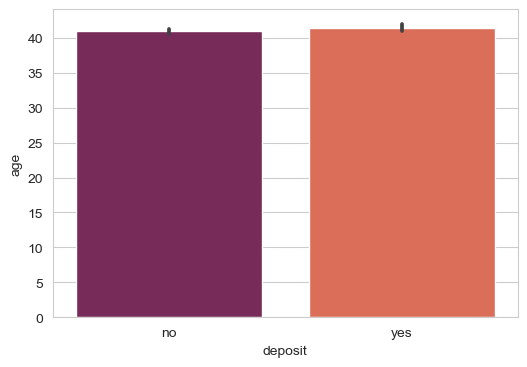

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x=df['deposit'],y=df['age'],palette="rocket")

Age and Deposit: there are more clients between the ages of 0 and 40 who subscribed to the term deposit.

<AxesSubplot:xlabel='deposit', ylabel='balance'>

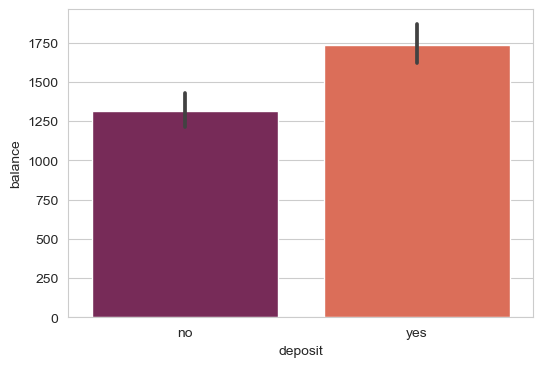

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x=df['deposit'],y=df['balance'],palette="rocket")

Balance and Deposit: there are more clients with a balance between 0 and 1750 who subscribed to the term deposit than those who did not.

<AxesSubplot:xlabel='deposit', ylabel='previous'>

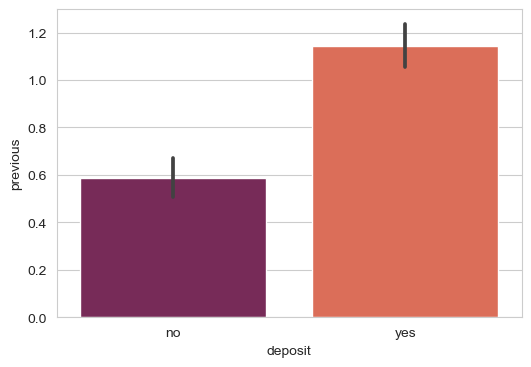

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x=df['deposit'],y=df['previous'],palette="rocket")

<AxesSubplot:xlabel='deposit', ylabel='campaign'>

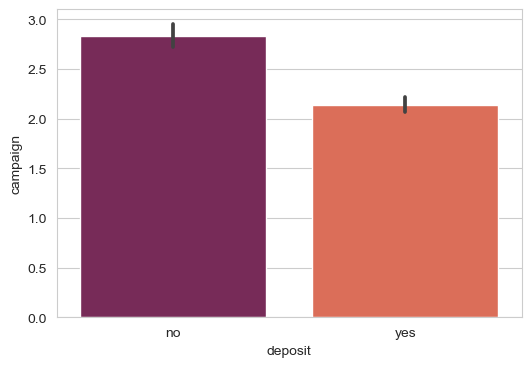

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x=df['deposit'],y=df['campaign'],palette="rocket")

Campaign and Deposit: there are less clients who had been contacted during this campaign compared to the previous campaign.



<AxesSubplot:xlabel='job', ylabel='count'>

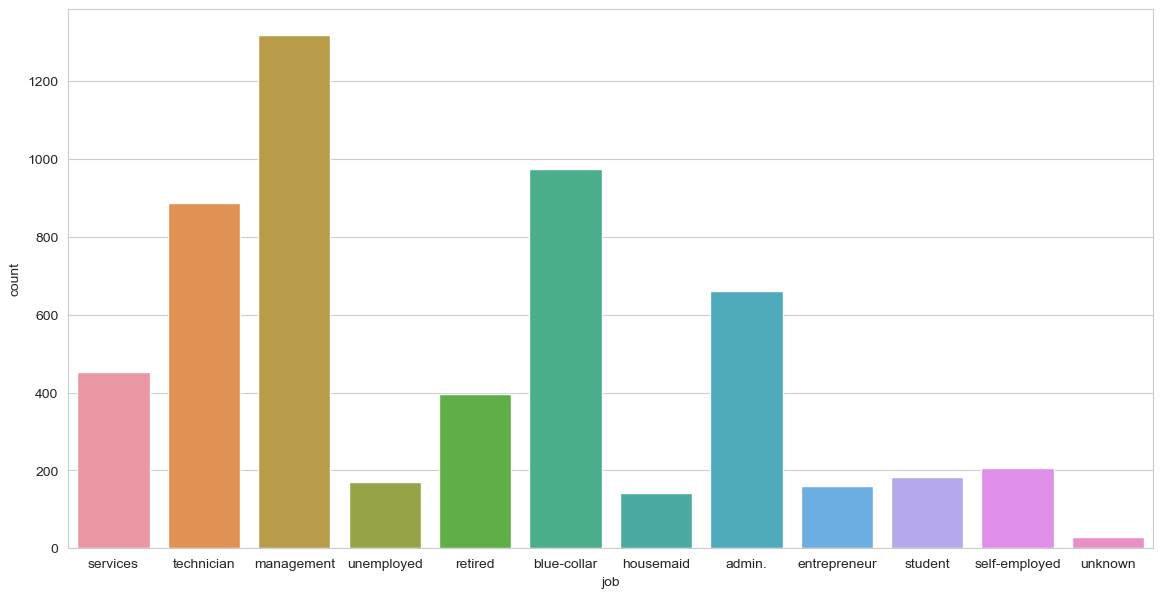

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(x=df['job'])

Job: from the visuals below, we can conclude that people with management jobs took part the most in the campaign.

<AxesSubplot:xlabel='marital', ylabel='count'>

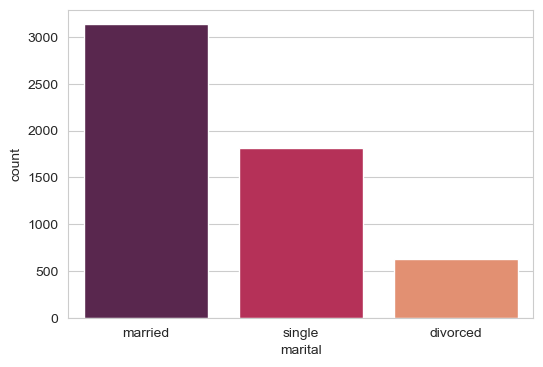

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x=df['marital'],palette="rocket")

Marital Status: there are more married people who took part in the campaign than single people or those with unknown marital statuses.

<AxesSubplot:xlabel='housing', ylabel='count'>

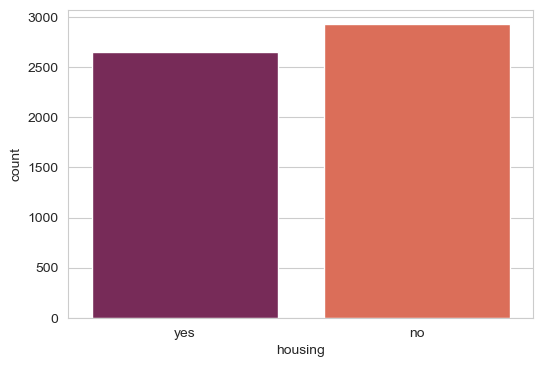

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x=df['housing'],palette="rocket")

housing: most clients had taken housing loan.

<AxesSubplot:xlabel='loan', ylabel='count'>

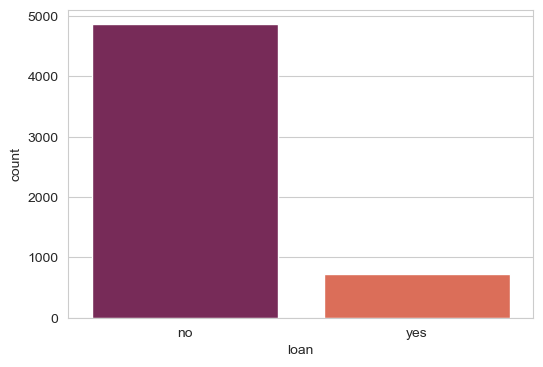

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x=df['loan'],palette="rocket")

Loan: most clients had not taken a personal loan.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

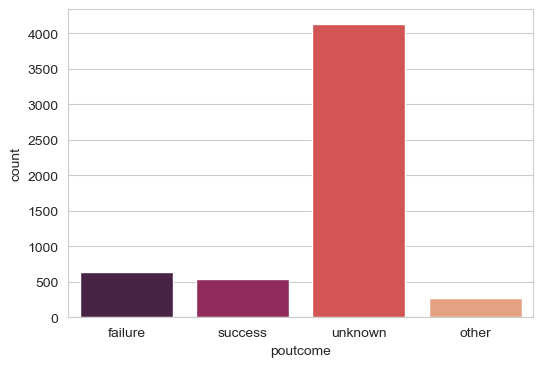

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x=df['poutcome'],palette="rocket")

poutcome: the outcome of the previous campaign is mostly unknown. From the Analysis, there were more failure than success.

In [27]:
correlation =  df.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.128465,0.009250,-0.008453,-0.018844,-0.002383,0.022026
balance,0.128465,1.000000,0.005989,0.022242,-0.015866,0.030656,0.044003
day,0.009250,0.005989,1.000000,-0.013211,0.133264,-0.073403,-0.048452
duration,-0.008453,0.022242,-0.013211,1.000000,-0.048190,-0.034635,-0.031562
campaign,-0.018844,-0.015866,0.133264,-0.048190,1.000000,-0.098066,-0.041082
pdays,-0.002383,0.030656,-0.073403,-0.034635,-0.098066,1.000000,0.492715
previous,0.022026,0.044003,-0.048452,-0.031562,-0.041082,0.492715,1.000000


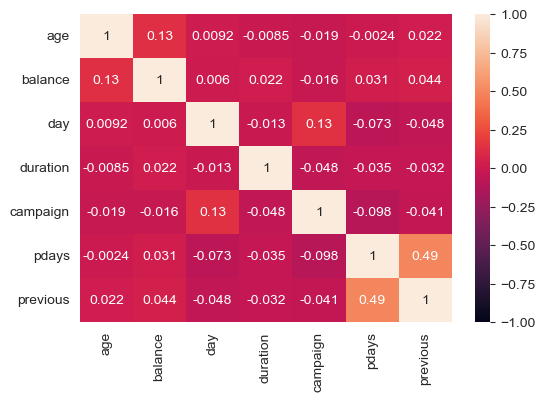

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation, cmap='rocket', annot=True, vmax=1, vmin=-1)
plt.show()

Using heat maps to visualize the correlation between the numerical values, it is quite evident that pdays and previous are highly correlated.

# Analysis of the target variable

<AxesSubplot:xlabel='deposit', ylabel='count'>

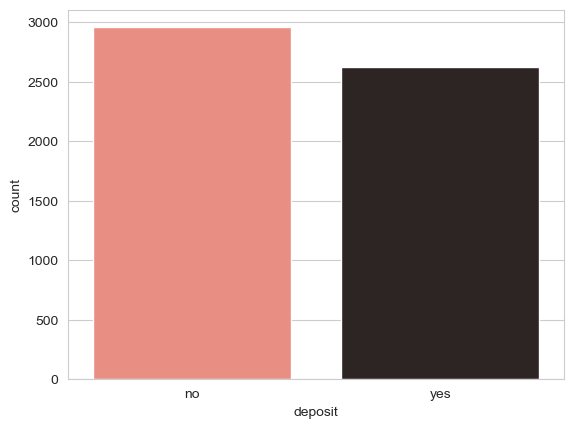

In [29]:
# create count plot
sns.countplot(x="deposit", data=df,palette="dark:salmon_r")

counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign's outcome.

<AxesSubplot:title={'center':'Job and deposit'}>

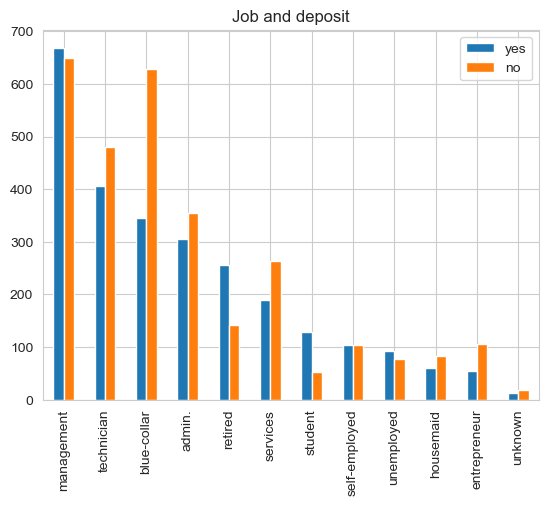

In [30]:
#Outlook of how 'deposit' column value varies depending on other categorical columns' values

#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

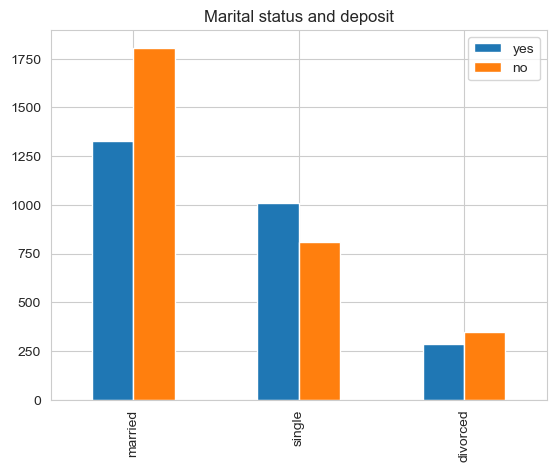

In [31]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

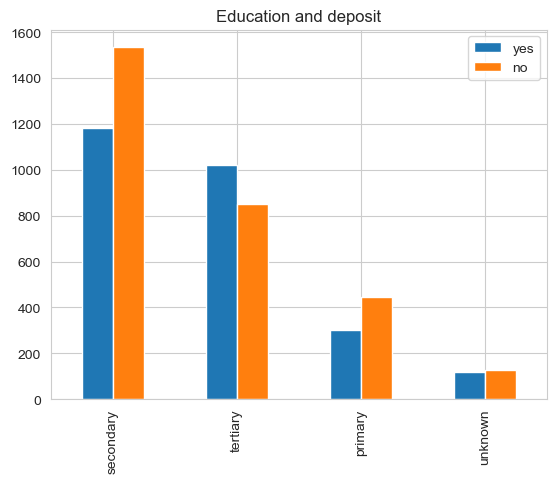

In [32]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'contact and deposit'}>

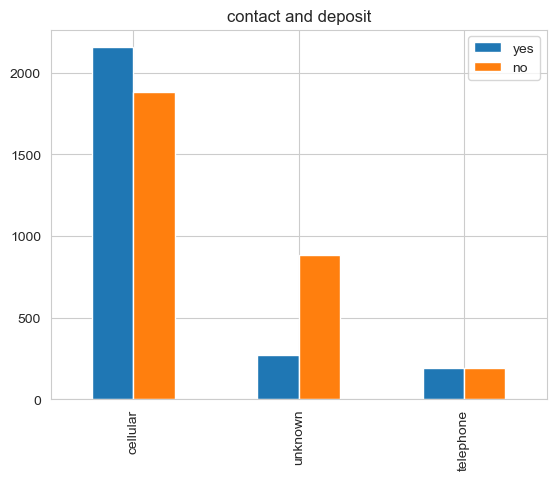

In [33]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'contact and deposit')

From the plots we can tell that according to our dataset:


1. Clients with 'blue-collar', 'services', 'technician', 'entrepreneur', 'admin' jobs are less likely to subscribe for term deposit.​

2. Divorced clients are less likely to subscribe for term deposit.​

3. Clients with secondary education are more likely to subscribe for term deposit​

4. Clients with 'cellular' type of contact are more likely to subscribe for term deposit when compared to customers with other types of contact.

In [34]:
#Outlook of how numerical columns affect term deposit subscription

#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,2622.000000,2959.000000
mean,1737.542715,1317.306185
std,3504.898747,3026.661738
min,-3058.000000,-2712.000000
25%,203.250000,55.500000
50%,719.000000,403.000000
75%,2155.000000,1328.000000
max,81204.000000,56831.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

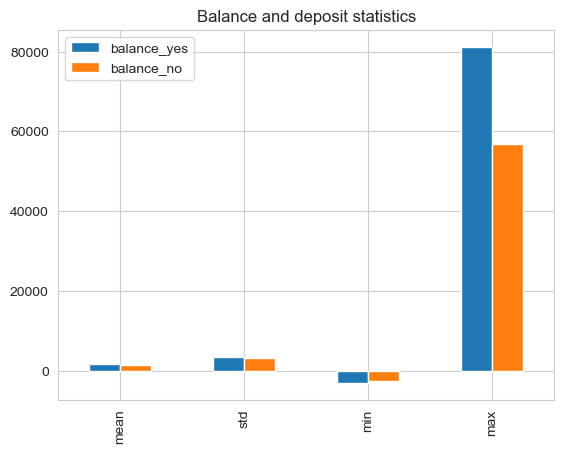

In [35]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [36]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
a_df

,age_yes,age_no
count,2622.000000,2959.000000
mean,41.426773,40.941872
std,13.560264,10.259777
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,93.000000,89.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

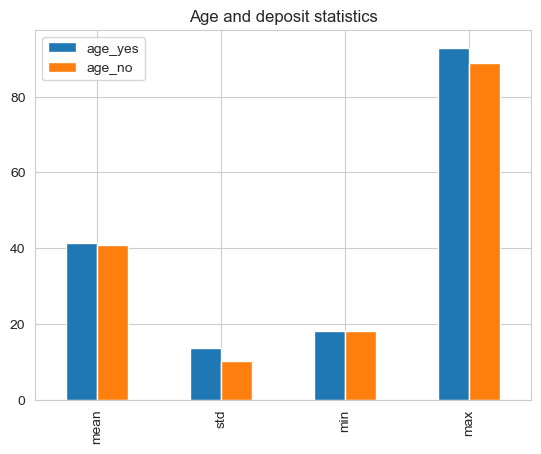

In [37]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [38]:
 #number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,2622.000000,2959.000000
mean,2.139207,2.833728
std,1.931702,3.308879
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

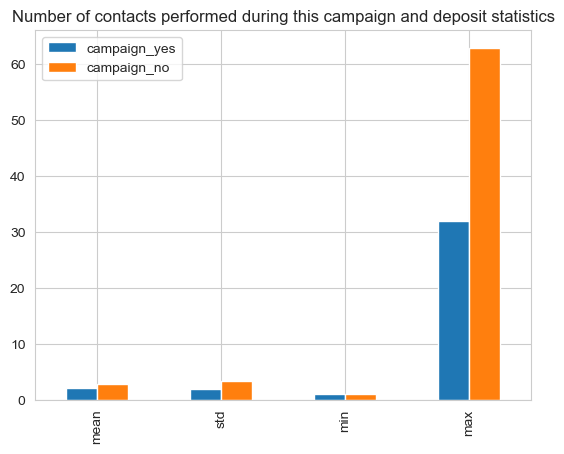

In [39]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [40]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,2622.000000,2959.000000
mean,1.145309,0.587699
std,2.350095,2.245196
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,30.000000,41.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

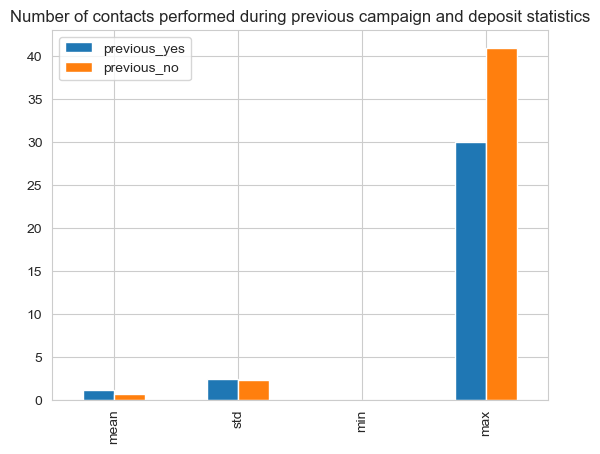

In [41]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

Looking at the plots above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

In [42]:
del df['pdays']

# Preparing the dataset for processing:


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve ,roc_auc_score, auc

In [44]:
# Encoding categorical variables
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['deposit'] = le.fit_transform(df['deposit'])

In [45]:
scaler = StandardScaler()
df[['age', 'duration', 'campaign', 'previous','balance','day']] = scaler.fit_transform(df[['age', 'duration', 'campaign', 'previous','balance','day']])

# CLASSIFICATION MODELS

In [46]:
X=df.drop(["deposit",],axis=1)
y=df["deposit"]

In [47]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 1. LOGISTIC REGRESSION

In [48]:
# Make an instance of the Model
logistic = LogisticRegression()

# Fitting the values for x and y
logistic.fit(x_train,y_train)
logistic.coef_
logistic.intercept_


array([0.19602074])

In [49]:
# Prediction from test data
prediction = logistic.predict(x_test)
print(prediction)

[1 0 0 ... 1 1 1]


In [50]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')

[[758 144]
 [211 562]]
True Positive[TP] = 562 
True Negative[TN]= 758 
False Positive[FP]= 144 
False Negative[FN]= 211 



In [51]:
# Finding Accuracy
logreg = accuracy_score(prediction,y_test)*100
print(logreg)

78.80597014925374


In [52]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != prediction).sum())

Misclassified samples: 355


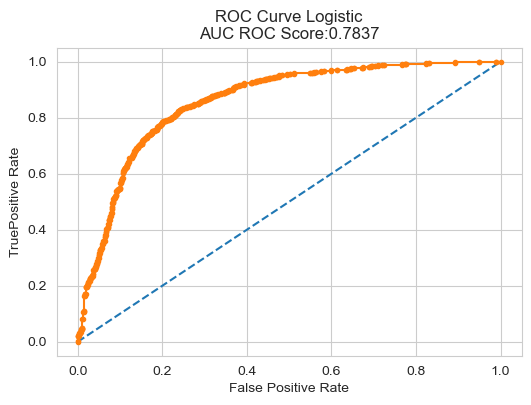

In [53]:
pred_prob_lmod1 = logistic.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_lmod1)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Logistic'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,prediction)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

# 2.KNN

In [54]:
# Storing the K nearest neighbors classifier
KNN = KNeighborsClassifier(n_neighbors = 5)  

In [55]:
# Fitting the values for X and Y
KNN.fit(x_train, y_train) 


KNeighborsClassifier()

In [56]:
# Predicting the test values with model
predictionknn = KNN.predict(x_test)

In [57]:
# Performance metric check
#confusion_matrix2 = confusion_matrix(y_test, predictionknn)
#print(confusion_matrix2)


In [58]:
# Confusion matrix
cf_matrix2 = confusion_matrix(y_test, predictionknn)
print(cf_matrix2)
TP = cf_matrix2[1,1] # true positive 
TN = cf_matrix2[0,0] # true negatives
FP = cf_matrix2[0,1] # false positives
FN = cf_matrix2[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')

[[766 136]
 [240 533]]
True Positive[TP] = 533 
True Negative[TN]= 766 
False Positive[FP]= 136 
False Negative[FN]= 240 



In [59]:
# Calculating the accuracy
knnscore=accuracy_score(y_test, predictionknn)*100
print(knnscore)

77.55223880597015


In [60]:
print('Misclassified samples: %d' % (y_test != predictionknn).sum())

Misclassified samples: 376


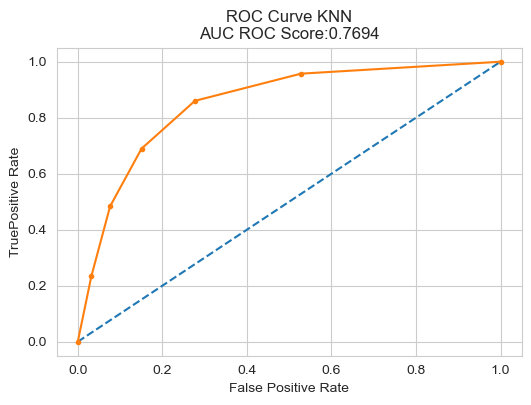

In [61]:
pred_prob_knn = KNN.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_knn)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'KNN'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,predictionknn)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

# 3. DECISION TREE

In [62]:
#Fitting the model

dtree = DecisionTreeClassifier()
classf = dtree.fit(x_train,y_train)

In [63]:
# Applying the model to the x_test

predictiondtree = classf.predict(x_test)
predictiondtree

array([1, 1, 0, ..., 1, 1, 0])

In [64]:
# Finding Accuracy

dectree= accuracy_score(predictiondtree,y_test)*100
print(dectree)

78.6865671641791


In [65]:
# Confusion Matrix

conf_dtree=confusion_matrix(y_test,predictiondtree)
print(conf_dtree)
TP = conf_dtree[1,1] # true positive 
TN = conf_dtree[0,0] # true negatives
FP = conf_dtree[0,1] # false positives
FN = conf_dtree[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')


[[709 193]
 [164 609]]
True Positive[TP] = 609 
True Negative[TN]= 709 
False Positive[FP]= 193 
False Negative[FN]= 164 



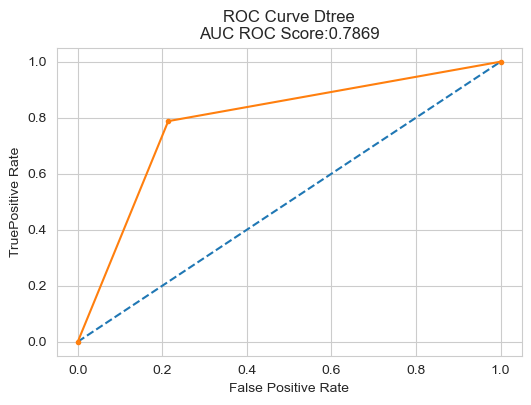

In [66]:
pred_prob_dtree = dtree.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_dtree)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Dtree'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,predictiondtree)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

# 4. RANDOM FOREST

In [67]:
#Fitting the model

rft = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rft.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [68]:
# Applying the model to the x_test

pred_rft= rft.predict(x_test)
pred_rft

array([1, 0, 0, ..., 1, 1, 1])

In [69]:
# Finding Accuracy

RanFor = accuracy_score(y_test,pred_rft)*100
print(RanFor)

83.28358208955224


In [70]:
# Confusion Matrix

conf_rft=confusion_matrix(y_test,pred_rft)
print(conf_rft)
TP = conf_rft[1,1] # true positive 
TN = conf_rft[0,0] # true negatives
FP = conf_rft[0,1] # false positives
FN = conf_rft[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')


[[749 153]
 [127 646]]
True Positive[TP] = 646 
True Negative[TN]= 749 
False Positive[FP]= 153 
False Negative[FN]= 127 



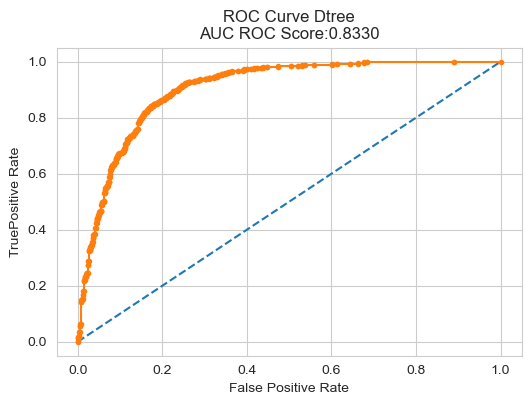

In [71]:
pred_prob_rft = rft.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_rft)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Dtree'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,pred_rft)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

# Model Comparison

In [72]:
models = pd.DataFrame({'Models': ['Logistic Regression','K-Near Neighbors','Decision Tree Classifier','Random Forest Classifier'],
                       'Score':  [logreg,knnscore,dectree,RanFor]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Random Forest Classifier,83.283582
0,Logistic Regression,78.805970
2,Decision Tree Classifier,78.686567
1,K-Near Neighbors,77.552239
